In [1]:
import numpy as np
import numpy.ma as ma
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
from matplotlib import gridspec

from fancy_plot import *

fancy_plot.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ga38tul/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/lib64/python2.7/site-packages/zmq/eventloop/

In [2]:
DATA_DIR = "/scratch9/mkron/data/NN_out/run52/"
#predictions_mctrue = pickle.load(file(os.path.join(DATA_DIR, 'prediction.pickle')))
epochs_acc_loss = np.delete(np.genfromtxt(os.path.join(DATA_DIR, "loss_logger.csv"), delimiter=','), 0, axis=0).T

In [3]:
class_names = ("Cascade", "Track", "DoubleBang")

In [4]:
pred =  predictions_mctrue["prediction"]
mc_true = predictions_mctrue["mc_truth"]['classificationTag_truth']
reco_vals = predictions_mctrue["reco_vals"]
energy=[]
for i in xrange(0, len(reco_vals)):
    energy.append(reco_vals[i][1])
energy = np.array(energy)

NameError: name 'predictions_mctrue' is not defined

In [5]:
pred_for_Cascade = pred[mc_true == 1]
E_for_Cascade = energy[mc_true == 1]
pred_for_Track = pred[mc_true == 2]
E_for_Track = energy[mc_true == 2]
pred_for_DB = pred[mc_true == 3]
E_for_DB = energy[mc_true == 3]

NameError: name 'pred' is not defined

In [6]:
absolute, xe,ye = np.histogram2d(np.argmax(predictions_mctrue["prediction"], axis=1)+1,predictions_mctrue["mc_truth"]['classificationTag_truth'][:len(pred)],bins=(3,3),range=((1,3),(1,3)))
# normalization if the absolute values, so that the sum over MCTRUTH is 1
# that means that the prediction has to correspond to a event type 
res_true = absolute/np.sum(absolute,axis=0)
# normalization if the absolute values, so that the sum over PREDICTION is 1
# that means that a event hast to be predicted as one type 
res_pred = absolute/np.sum(absolute,axis=1).reshape(-1,1)

NameError: name 'predictions_mctrue' is not defined

In [7]:
def plot_confusion_matrix(cm, classes,title="",
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('Predicted label')
    plt.xlabel('True label')

In [8]:
def acc_vs_energy_plot(pred, true, energy, title):
    '''
    inputs:
    pred: predictions of the NN of the events
    true: integer - what should the NN predict - number of class
    energy: energys of the events
       
    '''

    was_NN_right = [] #was_NN_right: Mask with 1 if prediction was right, if not 0
    for i in xrange(0,len(pred)):
        if np.argmax(pred[i])+1. == true:
            was_NN_right.append(1)
        else:
            was_NN_right.append(0)
    
    
    bins = np.linspace(np.min(np.log10(energy)), np.max(np.log10(energy)), 20)
    valsTrue = np.histogram(np.log10(energy), weights=was_NN_right, bins=bins)[0]
    valsAll = np.histogram(np.log10(energy), bins=bins)[0]
    acc = 1.*valsTrue/valsAll


    plt.plot(bins[:-1], acc)
    #plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('energy')

NameError: name 'pred_for_Cascade' is not defined

/home/ga38tul/.local/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


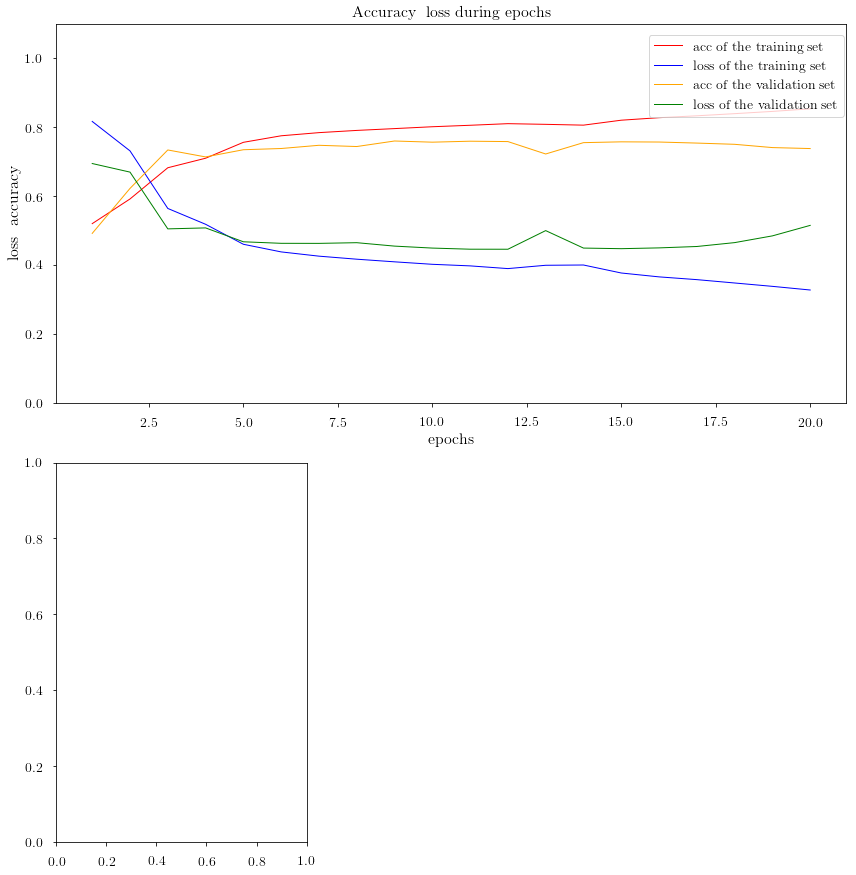

In [9]:
fig = plt.figure(figsize=(12,18))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
x = np.linspace(1, len(epochs_acc_loss[0]), num=len(epochs_acc_loss[0]), endpoint=True)
ax1.plot(x, epochs_acc_loss[1], color='red', label="acc of the training set")
ax1.plot(x, epochs_acc_loss[2], color='blue', label="loss of the training set")
ax1.plot(x, epochs_acc_loss[3], color='orange', label="acc of the validation set")
ax1.plot(x, epochs_acc_loss[4], color='green', label="loss of the validation set")
ax1.legend(bbox_to_anchor=(0.75, 0.97), loc=2, borderaxespad=0.)
ax1.set_title("Accuracy & loss during epochs", fontsize=16)
ax1.set_xlabel('epochs', fontsize=16)
ax1.set_ylabel('loss & accuracy', fontsize=16)
ax1.set_ylim(0., 1.1)

ax2 = plt.subplot2grid((3, 3), (1, 0))
ax2 = acc_vs_energy_plot(pred_for_Cascade, 1, E_for_Cascade, "Accuracy vs. Energy for class Cascade")

ax3 = plt.subplot2grid((3, 3), (1, 1))
ax3 = acc_vs_energy_plot(pred_for_Track, 2, E_for_Track, "Accuracy vs. Energy for class Track")

ax4 = plt.subplot2grid((3, 3), (1, 2))
ax4 = acc_vs_energy_plot(pred_for_DB, 3, E_for_DB, "Accuracy vs. Energy for class DoubleBang")

ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=1)
ax5 = plot_confusion_matrix(res_true, classes=class_names, title='Confusion matrix normalized on MCTruth')

ax6 = plt.subplot2grid((3, 3), (2, 1), colspan=1)
plot_confusion_matrix(res_pred, classes=class_names, title='Confusion matrix normalized on Predictions')


plt.tight_layout()
plt.show()

# save the above figure to the corresponding NN folder
fig.savefig(os.path.join(DATA_DIR, 'summary.pdf'))

In [23]:
DATA_DIR = "/scratch9/mkron/data/NN_out/run51/"
#predictions_mctrue = pickle.load(file(os.path.join(DATA_DIR, 'prediction.pickle')))
epochs_acc_loss = np.delete(np.genfromtxt(os.path.join(DATA_DIR, "loss_logger.csv"), delimiter=','), 0, axis=0).T

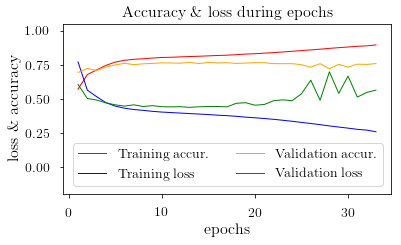

In [41]:
fig, ax1 = newfig(0.9)
x = np.linspace(1, len(epochs_acc_loss[0]), num=len(epochs_acc_loss[0]), endpoint=True)
ax1.plot(x, epochs_acc_loss[1], color='red', label="Training accur.")
ax1.plot(x, epochs_acc_loss[2], color='blue', label="Training loss")
ax1.plot(x, epochs_acc_loss[3], color='orange', label="Validation accur.")
ax1.plot(x, epochs_acc_loss[4], color='green', label="Validation loss")
#ax1.legend(loc ='best', borderaxespad=0., ncol=2)
ax1.legend(bbox_to_anchor=(0.975 , 0.3), ncol=2, borderaxespad=0.)
ax1.set_title(r"Accuracy \& loss during epochs", fontsize=16)
ax1.set_xlabel(r'epochs', fontsize=16)
ax1.set_ylabel(r'loss \& accuracy', fontsize=16)
ax1.set_ylim(-0.2, 1.05)

#fig.savefig('loss.pdf')